## **JSON exercise**


In [284]:
#import the relevant libraries and packages
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize

import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
# load json as string
df_json1= json.load((open('data/world_bank_projects.json')))

In [ ]:
df_json1

In [ ]:
# load as Pandas dataframe
df_json2 = pd.read_json('data/world_bank_projects.json')
df_json2

**Objective 1: Find the 10 countries with most projects**

In [184]:
print(type(df_json2.countryname))

<class 'pandas.core.series.Series'>


In [185]:
top_countries = df_json2.countryname.value_counts()

In [186]:
top_ten = top_countries.nlargest(10)

In [187]:
top_ten

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

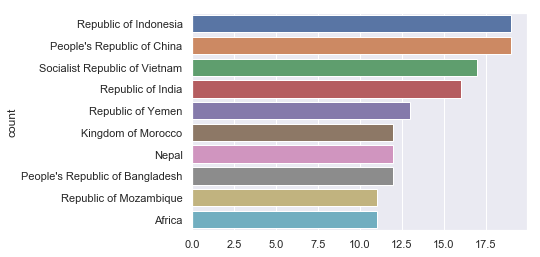

In [457]:
# Set seaborn style
sns.set(color_codes=True)

# Plot histogram
ax = sns.barplot(y= top_ten.index, x=top_ten.values)
ax.set(ylabel="count")
plt.show()

**Objective 2: Find the top 10 major project themes**

In [ ]:
json_normalize(df_json1, 'mjtheme_namecode', errors='ignore' )

In [440]:
project_list1 = json_normalize(df_json1, 'mjtheme_namecode', errors='ignore' )

In [445]:
#project_list1.groupby('name').count().sort_values('code', ascending=False)

,code
name,
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
,122
Social dev/gender/inclusion,119
Trade and integration,72


In [441]:
project_list1['name'].value_counts()[:10]

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [228]:
#project_list1['code'].nlargest(10)

name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: code, dtype: int64

In [458]:
l = project_list1['name'].value_counts()[:10]

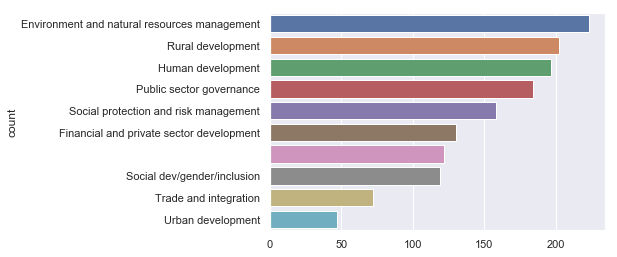

In [486]:
# Set seaborn style
sns.set(color_codes=True)

# Plot histogram
ax = sns.barplot(y= l.index, x=l.values)
ax.set(ylabel="count")
plt.show()

**Objective 3: Create a dataframe with the missing names filled in**

In [447]:
#create 
new_df = project_list1[project_list1['name'] != ''].drop_duplicates()

In [448]:
new_df

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


In [450]:
code_list = new_df['code'].tolist()

In [451]:
name_list = new_df['name'].tolist()

In [463]:
zip1 = zip(code_list ,name_list)

In [465]:
new_dict = {k: v for k, v in zip1}

In [478]:
project_list2 = project_list1.applymap(lambda x: np.nan if x == '' else x)

In [480]:
project_list2['name'] = project_list2['name'].fillna(project_list2['code'].apply(lambda x: new_dict.get(x)))

In [487]:
m= project_list2['name'].value_counts()

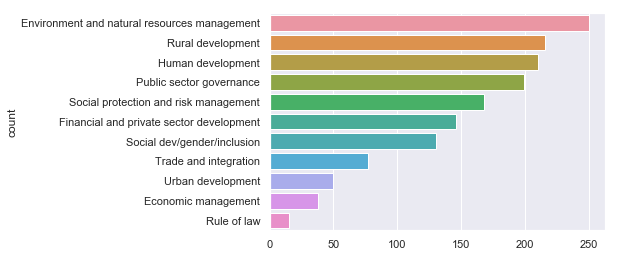

In [488]:
# Set seaborn style
sns.set(color_codes=True)

# Plot histogram
ax = sns.barplot(y= m.index, x=m.values)
ax.set(ylabel="count")
plt.show()